# Sentiment analysis - TEST

Here we will test the twitter and the BERT sentiment analysis models

### Imports

In [37]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [17]:
# Add the project root directory (not src) to sys.path
sys.path.append(os.path.abspath("../src/data/"))

# Now import the DataLoader class
from data_loading import DataLoader

raw = '../data/RAW/'
clean = '../data/CLEAN'

In [3]:
# Add the directory containing the script to sys.path
sys.path.append(os.path.abspath("../src/model"))

# Now you can import the script like a module
import twitter_emotion
import DistillBERT_emotion

/Users/djay/miniforge3/envs/ada/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load the data
- load the data
- add multiple indexing
- first processing to have unique index

In [4]:
#load raw data
data_loader = DataLoader(raw,clean)
CMU_movie_metadata = data_loader.movie_data()
CMU_plot_summary = data_loader.plot_data()


load CMU movie metadata


load plot data



In [5]:
Sample_size = 100

## Twitter emotion MLP

In [18]:
twitter_data = [] 
for index in CMU_plot_summary.index[0:Sample_size]:
    if index in CMU_movie_metadata.index:
        ID = CMU_movie_metadata.loc[index]["Movie name"]
        Scores = twitter_emotion.extract_emotion(CMU_plot_summary.loc[index]["Plot"])

        twitter_data.append({
            "ID": ID,
            "joy": Scores[0],
            "optimisn": Scores[1],
            "anger": Scores[2],
            "sadness": Scores[3]
        })

Sentiment_twitter = pd.DataFrame(twitter_data)

Sentiment_twitter

,ID,joy,optimisn,anger,sadness
0,Taxi Blues,0.181509,0.483768,0.105209,0.229514
1,The Hunger Games,0.651918,0.094233,0.138482,0.115366
2,Narasimham,0.661327,0.070027,0.051361,0.217284
3,The Lemon Drop Kid,0.365356,0.198905,0.198947,0.236792
4,A Cry in the Dark,0.392123,0.041404,0.094597,0.471875
...,...,...,...,...,...
95,Expired,0.577040,0.199860,0.075505,0.147595
96,Classmates,0.038776,0.566576,0.136673,0.257976
97,Spring Bears Love,0.047321,0.190293,0.093595,0.668791
98,Ninja Resurrection,0.525135,0.180857,0.159507,0.134501


## distillBERT sentiment analysis

In [19]:

# Lists to accumulate rows for efficiency
sentiment_data = []

detector = DistillBERT_emotion.ViolenceDetector()
for index in CMU_plot_summary.index[0:Sample_size]:
    if index  in CMU_movie_metadata.index:
        ID = CMU_movie_metadata.loc[index]["Movie name"]

        result = detector.analyze_violence(CMU_plot_summary.loc[index]["Plot"])

        sentiment_data.append({
            "ID": ID,
            "sadness": result[0],
            "joy": result[1],
            "love": result[2],
            "anger": result[3],
            "fear": result[4],
            "surprise": result[5]
        })

Sentiment = pd.DataFrame(sentiment_data)

Sentiment

Token indices sequence length is longer than the specified maximum sequence length for this model (1056 > 512). Running this sequence through the model will result in indexing errors


,ID,sadness,joy,love,anger,fear,surprise
0,Taxi Blues,0.003469,0.003627,0.001354,0.005651,0.620628,0.365272
1,The Hunger Games,0.034945,0.246066,0.006380,0.641789,0.068045,0.002775
2,Narasimham,0.074893,0.223746,0.004939,0.646569,0.048130,0.001722
3,The Lemon Drop Kid,0.002414,0.041136,0.001093,0.937746,0.016361,0.001250
4,A Cry in the Dark,0.009090,0.018188,0.001596,0.320643,0.646485,0.003999
...,...,...,...,...,...,...,...
95,Expired,0.008209,0.043640,0.002368,0.646654,0.297496,0.001631
96,Classmates,0.132640,0.566925,0.010288,0.251851,0.034352,0.003944
97,Spring Bears Love,0.002645,0.003079,0.979328,0.004099,0.008246,0.002604
98,Ninja Resurrection,0.044497,0.121816,0.003520,0.518052,0.307351,0.004764


In [31]:
# save the result
#Sentiment.to_csv('../data/CLEAN/Sentiment_analysis/sentiment.csv') 

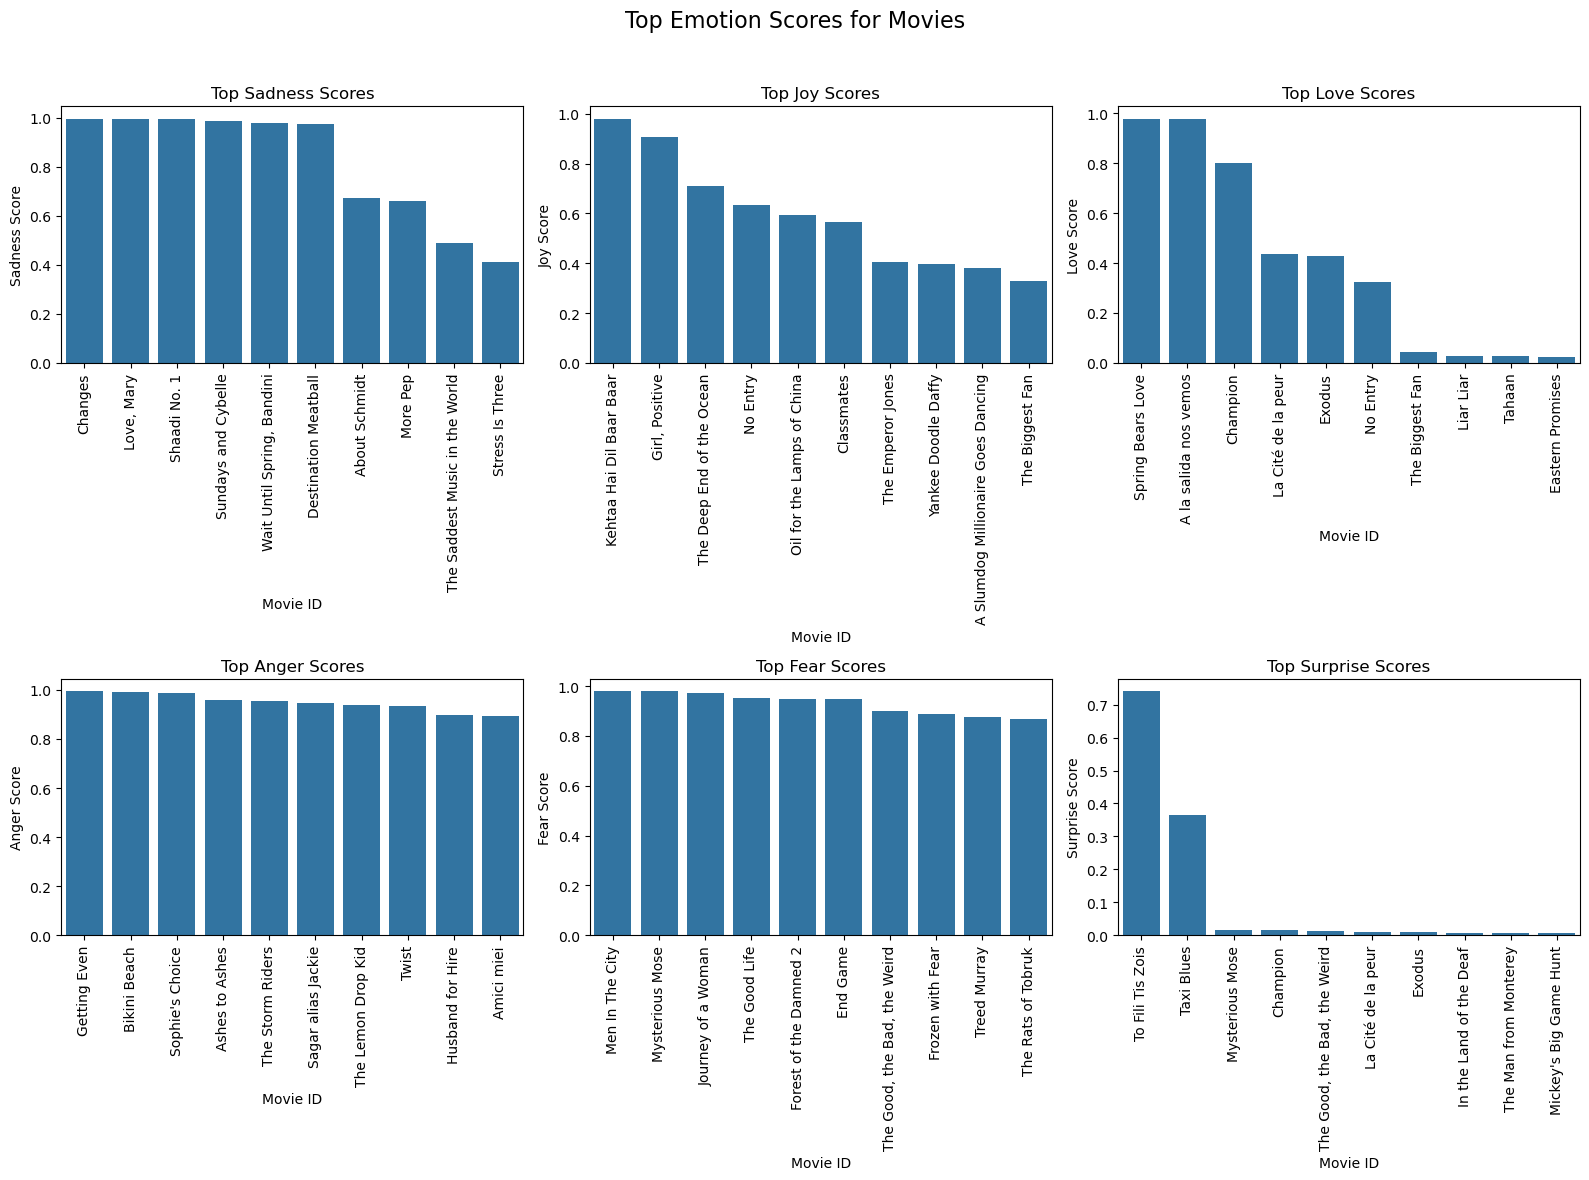

In [36]:
X = 10
emotions = ["sadness",
            "joy",
            "love",
            "anger",
            "fear",
            "surprise"]

# Create a figure with subplots (1x3 grid)
fig, axes = plt.subplots(2, 3, figsize=(16,12))

# Set a title for the entire figure
fig.suptitle('Top Emotion Scores for Movies', fontsize=16)

for i in range(0,len(emotions)):
    
    # Plot for Sadness with vertical x labels
    sns.barplot(x='ID', y=emotions[i], data=Sentiment.sort_values(emotions[i],ascending=False).iloc[0:X],ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'Top {emotions[i].capitalize()} Scores')
    axes[i//3, i%3].set_xlabel('Movie ID')
    axes[i//3, i%3].set_ylabel(f'{emotions[i].capitalize()} Score')

    axes[i//3, i%3].set_xticks(range(X))  # Ensure ticks are set
    axes[i//3, i%3].set_xticklabels(axes[i//3, i%3].get_xticklabels(), rotation=90)


# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit suptitle
plt.show()
